<a href="https://colab.research.google.com/github/BHUVAN-RJ/TMLC-Fellowship/blob/main/Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Image Classification using CNN (KERAS)

## Step 1. Load data directory from Kaggle using API

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "bhuvanrj" # username from the json file
os.environ['KAGGLE_KEY'] = "f57a72acda66ee9152f2618c770b4c82" # key from the json file

In [ ]:
!kaggle datasets download -d saurabhshahane/barkvn50

 91% 160M/176M [00:00<00:00, 204MB/s]
100% 176M/176M [00:00<00:00, 208MB/s]


In [ ]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/barkvn50.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


## Step 2. Exploratory Data Analysis (EDA) 

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/content/BarkVN-50/BarkVN-50_mendeley')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/BarkVN-50/BarkVN-50_mendeley"))
file_count = len(files)
print(file_count)

['Casuarina equisetifolia', 'Musa', 'Citrus aurantiifolia', 'Polyalthia longifolia', 'Wrightia', 'Ficus racemosa', 'Erythrina fusca', 'Artocarpus altilis', 'Barringtonia acutangula', 'Prunus salicina', 'Cocos nucifera', 'Adenium species', 'Dalbergia oliveri', 'Khaya senegalensis A.Juss', 'Cananga odorata', 'Adenanthera microsperma', 'Artocarpus heterophyllus', 'Senna siamea', 'Psidium guajava', 'Hevea brasiliensis', 'Melia azedarach', 'Melaleuca', 'Chrysophyllum cainino', 'Tectona grandis', 'Cedrus', 'Eucalyptus', 'Veitchia merrilli', 'Persea', 'Khaya senegalensis', 'Magnolia alba', 'Acacia', 'Spondias mombin L', 'Terminalia catappa', 'Lagerstroemia speciosa', 'Nephelium lappaceum', 'Annona squamosa', 'Gmelina arborea Roxb', 'Delonix regia', 'Hopea', 'Anacardium occidentale', 'Dipterocarpus alatus', 'Citrus grandis', 'Syzygium nervosum', 'Wrightia religiosa', 'Ficus microcarpa', 'Carica papaya', 'Prunnus', 'Pterocarpus macrocarpus', 'Mangifera', 'Tamarindus indica']
0


In [ ]:
# Make new base directory
original_dataset_dir = '/content/BarkVN-50/BarkVN-50_mendeley'
base_dir = '/content/bark-data/'
os.mkdir(base_dir)

In [ ]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

#Under train folder create sub folders 

for dir_name in data_dir_list:
  name = f"train_{dir_name}_dir"
  name = os.path.join(train_dir, dir_name)
  os.mkdir(name)

#Under validation folder create sub folders 

for dir_name in data_dir_list:
  name = f"validation_{dir_name}_dir"
  name = os.path.join(validation_dir, dir_name)
  os.mkdir(name)


In [ ]:
data_dir_list = os.listdir('/content/bark-data/train')
print(len(data_dir_list))

50


In [ ]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [ ]:
ACACIA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Acacia/'
TRAINING_ACACIA_DIR = '/content/bark-data/train/Acacia/'
VALIDATION_ACACIA_DIR = '/content/bark-data/validation/Acacia/'

ADENANTHERA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Adenanthera microsperma/'
TRAINING_ADENANTHERA_DIR = '/content/bark-data/train/Adenanthera microsperma/'
VALIDATION_ADENANTHERA_DIR = '/content/bark-data/validation/Adenanthera microsperma/'

ADENIUM_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Adenium species/'
TRAINING_ADENIUM_DIR = '/content/bark-data/train/Adenium species/'
VALIDATION_ADENIUM_DIR = '/content/bark-data/validation/Adenium species/'

ANACARDIUM_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Anacardium occidentale/'
TRAINING_ANACARDIUM_DIR = '/content/bark-data/train/Anacardium occidentale/'
VALIDATION_ANACARDIUM_DIR = '/content/bark-data/validation/Anacardium occidentale/'

ANNONA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Annona squamosa/'
TRAINING_ANNONA_DIR = '/content/bark-data/train/Annona squamosa/'
VALIDATION_ANNONA_DIR = '/content/bark-data/validation/Annona squamosa/'

ARTOCARPUS_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Artocarpus altilis/'
TRAINING_ARTOCARPUS_DIR = '/content/bark-data/train/Artocarpus altilis/'
VALIDATION_ARTOCARPUS_DIR = '/content/bark-data/validation/Artocarpus altilis/'

ARTOCARPUS_HETRO_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Artocarpus heterophyllus/'
TRAINING_ARTOCARPUS_HETRO_DIR = '/content/bark-data/train/Artocarpus heterophyllus/'
VALIDATION_ARTOCARPUS_HETRO_DIR = '/content/bark-data/validation/Artocarpus heterophyllus/'

BARRINGTONIA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Barringtonia acutangula/'
TRAINING_BARRINGTONIA_DIR = '/content/bark-data/train/Barringtonia acutangula/'
VALIDATION_BARRINGTONIA_DIR = '/content/bark-data/validation/Barringtonia acutangula/'

CANANGA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Cananga odorata/'
TRAINING_CANANGA_DIR = '/content/bark-data/train/Cananga odorata/'
VALIDATION_CANANGA_DIR = '/content/bark-data/validation/Cananga odorata/'

CARICA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Carica papaya/'
TRAINING_CARICA_DIR = '/content/bark-data/train/Carica papaya/'
VALIDATION_CARICA_DIR = '/content/bark-data/validation/Carica papaya/'

CASUARINA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Casuarina equisetifolia/'
TRAINING_CASUARINA_DIR = '/content/bark-data/train/Casuarina equisetifolia/'
VALIDATION_CASUARINA_DIR = '/content/bark-data/validation/Casuarina equisetifolia/'

CEDRUS_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Cedrus/'
TRAINING_CEDRUS_DIR = '/content/bark-data/train/Cedrus/'
VALIDATION_CEDRUS_DIR = '/content/bark-data/validation/Cedrus/'

CHRYSOPHYLLUM_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Chrysophyllum cainino/'
TRAINING_CHRYSOPHYLLUM_DIR = '/content/bark-data/train/Chrysophyllum cainino/'
VALIDATION_CHRYSOPHYLLUM_DIR = '/content/bark-data/validation/Chrysophyllum cainino/'

CITRUS_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Citrus aurantiifolia/'
TRAINING_CITRUS_DIR = '/content/bark-data/train/Citrus aurantiifolia/'
VALIDATION_CITRUS_DIR = '/content/bark-data/validation/Citrus aurantiifolia/'

GRANDIS_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Citrus grandis/'
TRAINING_GRANDIS_DIR = '/content/bark-data/train/Citrus grandis/'
VALIDATION_GRANDIS_DIR = '/content/bark-data/validation/Citrus grandis/'

COCOS_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Cocos nucifera/'
TRAINING_COCOS_DIR = '/content/bark-data/train/Cocos nucifera/'
VALIDATION_COCOS_DIR = '/content/bark-data/validation/Cocos nucifera/'

DALBERGIA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Dalbergia oliveri/'
TRAINING_DALBERGIA_DIR = '/content/bark-data/train/Dalbergia oliveri/'
VALIDATION_DALBERGIA_DIR = '/content/bark-data/validation/Dalbergia oliveri/'

DELONIX_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Delonix regia/'
TRAINING_DELONIX_DIR = '/content/bark-data/train/Delonix regia/'
VALIDATION_DELONIX_DIR = '/content/bark-data/validation/Delonix regia/'

DIPTEROCARPUS_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Dipterocarpus alatus/'
TRAINING_DIPTEROCARPUS_DIR = '/content/bark-data/train/Dipterocarpus alatus/'
VALIDATION_DIPTEROCARPUS_DIR = '/content/bark-data/validation/Dipterocarpus alatus/'

ERYTHRINA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Erythrina fusca/'
TRAINING_ERYTHRINA_DIR = '/content/bark-data/train/Erythrina fusca/'
VALIDATION_ERYTHRINA_DIR = '/content/bark-data/validation/Erythrina fusca/'

EUCALYPTUS_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Eucalyptus/'
TRAINING_EUCALYPTUS_DIR = '/content/bark-data/train/Eucalyptus/'
VALIDATION_EUCALYPTUS_DIR = '/content/bark-data/validation/Eucalyptus/'

FICUS_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Ficus microcarpa/'
TRAINING_FICUS_DIR = '/content/bark-data/train/Ficus microcarpa/'
VALIDATION_FICUS_DIR = '/content/bark-data/validation/Ficus microcarpa/'

RACEMOSA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Ficus racemosa/'
TRAINING_RACEMOSA_DIR = '/content/bark-data/train/Ficus racemosa/'
VALIDATION_RACEMOSA_DIR = '/content/bark-data/validation/Ficus racemosa/'

GMELINA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Gmelina arborea Roxb/'
TRAINING_GMELINA_DIR = '/content/bark-data/train/Gmelina arborea Roxb/'
VALIDATION_GMELINA_DIR = '/content/bark-data/validation/Gmelina arborea Roxb/'

HEVEA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Hevea brasiliensis/'
TRAINING_HEVEA_DIR = '/content/bark-data/train/Hevea brasiliensis/'
VALIDATION_HEVEA_DIR = '/content/bark-data/validation/Hevea brasiliensis/'

HOPEA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Hopea/'
TRAINING_HOPEA_DIR = '/content/bark-data/train/Hopea/'
VALIDATION_HOPEA_DIR = '/content/bark-data/validation/Hopea/'

KHAYA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Khaya senegalensis/'
TRAINING_KHAYA_DIR = '/content/bark-data/train/Khaya senegalensis/'
VALIDATION_KHAYA_DIR = '/content/bark-data/validation/Khaya senegalensis/'

AJUSS_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Khaya senegalensis A.Juss/'
TRAINING_AJUSS_DIR = '/content/bark-data/train/Khaya senegalensis A.Juss/'
VALIDATION_AJUSS_DIR = '/content/bark-data/validation/Khaya senegalensis A.Juss/'

LAGERSTROEMIA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Lagerstroemia speciosa/'
TRAINING_LAGERSTROEMIA_DIR = '/content/bark-data/train/Lagerstroemia speciosa/'
VALIDATION_LAGERSTROEMIA_DIR = '/content/bark-data/validation/Lagerstroemia speciosa/'

MAGNOLIA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Magnolia alba/'
TRAINING_MAGNOLIA_DIR = '/content/bark-data/train/Magnolia alba/'
VALIDATION_MAGNOLIA_DIR = '/content/bark-data/validation/Magnolia alba/'

MANGIFERA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Mangifera/'
TRAINING_MANGIFERA_DIR = '/content/bark-data/train/Mangifera/'
VALIDATION_MANGIFERA_DIR = '/content/bark-data/validation/Mangifera/'

MELALUCA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Melaleuca/'
TRAINING_MELALUCA_DIR = '/content/bark-data/train/Melaleuca/'
VALIDATION_MELALUCA_DIR = '/content/bark-data/validation/Melaleuca/'

MELIA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Melia azedarach/'
TRAINING_MELIA_DIR = '/content/bark-data/train/Melia azedarach/'
VALIDATION_MELIA_DIR = '/content/bark-data/validation/Melia azedarach/'

MUSA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Musa/'
TRAINING_MUSA_DIR = '/content/bark-data/train/Musa/'
VALIDATION_MUSA_DIR = '/content/bark-data/validation/Musa/'

NEPHELIUM_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Nephelium lappaceum/'
TRAINING_NEPHELIUM_DIR = '/content/bark-data/train/Nephelium lappaceum/'
VALIDATION_NEPHELIUM_DIR = '/content/bark-data/validation/Nephelium lappaceum/'

PERSEA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Persea/'
TRAINING_PERSEA_DIR = '/content/bark-data/train/Persea/'
VALIDATION_PERSEA_DIR = '/content/bark-data/validation/Persea/'

POLY_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Polyalthia longifolia/'
TRAINING_POLY_DIR = '/content/bark-data/train/Polyalthia longifolia/'
VALIDATION_POLY_DIR = '/content/bark-data/validation/Polyalthia longifolia/'

PRUNNUS_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Prunnus/'
TRAINING_PRUNNUS_DIR = '/content/bark-data/train/Prunnus/'
VALIDATION_PRUNNUS_DIR = '/content/bark-data/validation/Prunnus/'

SALICINA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Prunus salicina/'
TRAINING_SALICINA_DIR = '/content/bark-data/train/Prunus salicina/'
VALIDATION_SALICINA_DIR = '/content/bark-data/validation/Prunus salicina/'

GUAJAVA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Psidium guajava/'
TRAINING_GUAJAVA_DIR = '/content/bark-data/train/Psidium guajava/'
VALIDATION_GUAJAVA_DIR = '/content/bark-data/validation/Psidium guajava/'

PETROCARPUS_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Pterocarpus macrocarpus/'
TRAINING_PETROCARPUS_DIR = '/content/bark-data/train/Pterocarpus macrocarpus/'
VALIDATION_PETROCARPUS_DIR = '/content/bark-data/validation/Pterocarpus macrocarpus/'

SENNA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Senna siamea/'
TRAINING_SENNA_DIR = '/content/bark-data/train/Senna siamea/'
VALIDATION_SENNA_DIR = '/content/bark-data/validation/Senna siamea/'

SPONDIAS_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Spondias mombin L/'
TRAINING_SPONDIAS_DIR = '/content/bark-data/train/Spondias mombin L/'
VALIDATION_SPONDIAS_DIR = '/content/bark-data/validation/Spondias mombin L/'

SYZYGIUM_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Syzygium nervosum/'
TRAINING_SYZYGIUM_DIR = '/content/bark-data/train/Syzygium nervosum/'
VALIDATION_SYZYGIUM_DIR = '/content/bark-data/validation/Syzygium nervosum/'

TAMARINDUS_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Tamarindus indica/'
TRAINING_TAMARINDUS_DIR = '/content/bark-data/train/Tamarindus indica/'
VALIDATION_TAMARINDUS_DIR = '/content/bark-data/validation/Tamarindus indica/'

TECTONA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Tectona grandis/'
TRAINING_TECTONA_DIR = '/content/bark-data/train/Tectona grandis/'
VALIDATION_TECTONA_DIR = '/content/bark-data/validation/Tectona grandis/'

TERMINALIA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Terminalia catappa/'
TRAINING_TERMINALIA_DIR = '/content/bark-data/train/Terminalia catappa/'
VALIDATION_TERMINALIA_DIR = '/content/bark-data/validation/Terminalia catappa/'

VEITCHIA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Veitchia merrilli/'
TRAINING_VEITCHIA_DIR = '/content/bark-data/train/Veitchia merrilli/'
VALIDATION_VEITCHIA_DIR = '/content/bark-data/validation/Veitchia merrilli/'

WRIGHTIA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Wrightia/'
TRAINING_WRIGHTIA_DIR = '/content/bark-data/train/Wrightia/'
VALIDATION_WRIGHTIA_DIR = '/content/bark-data/validation/Wrightia/'

RELIGIOSA_SOURCE_DIR = '/content/BarkVN-50/BarkVN-50_mendeley/Wrightia religiosa/'
TRAINING_RELIGIOSA_DIR = '/content/bark-data/train/Wrightia religiosa/'
VALIDATION_RELIGIOSA_DIR = '/content/bark-data/validation/Wrightia religiosa/'

In [ ]:
import os
import random
from shutil import copyfile

split_size = .85

split_data(ACACIA_SOURCE_DIR, TRAINING_ACACIA_DIR, VALIDATION_ACACIA_DIR, split_size)
split_data(RELIGIOSA_SOURCE_DIR, TRAINING_RELIGIOSA_DIR, VALIDATION_RELIGIOSA_DIR, split_size)
split_data(WRIGHTIA_SOURCE_DIR, TRAINING_WRIGHTIA_DIR, VALIDATION_WRIGHTIA_DIR, split_size)
split_data(VEITCHIA_SOURCE_DIR, TRAINING_VEITCHIA_DIR, VALIDATION_VEITCHIA_DIR, split_size)
split_data(TERMINALIA_SOURCE_DIR, TRAINING_TERMINALIA_DIR, VALIDATION_TERMINALIA_DIR, split_size)
split_data(TECTONA_SOURCE_DIR, TRAINING_TECTONA_DIR, VALIDATION_TECTONA_DIR, split_size)
split_data(TAMARINDUS_SOURCE_DIR, TRAINING_TAMARINDUS_DIR, VALIDATION_TAMARINDUS_DIR, split_size)
split_data(SYZYGIUM_SOURCE_DIR, TRAINING_SYZYGIUM_DIR, VALIDATION_SYZYGIUM_DIR, split_size)
split_data(SPONDIAS_SOURCE_DIR, TRAINING_SPONDIAS_DIR, VALIDATION_SPONDIAS_DIR, split_size)
split_data(SENNA_SOURCE_DIR, TRAINING_SENNA_DIR, VALIDATION_SENNA_DIR, split_size)
split_data(PETROCARPUS_SOURCE_DIR, TRAINING_PETROCARPUS_DIR, VALIDATION_PETROCARPUS_DIR, split_size)
split_data(GUAJAVA_SOURCE_DIR, TRAINING_GUAJAVA_DIR, VALIDATION_GUAJAVA_DIR, split_size)
split_data(SALICINA_SOURCE_DIR, TRAINING_SALICINA_DIR, VALIDATION_SALICINA_DIR, split_size)
split_data(PRUNNUS_SOURCE_DIR, TRAINING_PRUNNUS_DIR, VALIDATION_PRUNNUS_DIR, split_size)
split_data(POLY_SOURCE_DIR, TRAINING_POLY_DIR, VALIDATION_POLY_DIR, split_size)
split_data(PERSEA_SOURCE_DIR, TRAINING_PERSEA_DIR, VALIDATION_PERSEA_DIR, split_size)
split_data(NEPHELIUM_SOURCE_DIR, TRAINING_NEPHELIUM_DIR, VALIDATION_NEPHELIUM_DIR, split_size)
split_data(MUSA_SOURCE_DIR, TRAINING_MUSA_DIR, VALIDATION_MUSA_DIR, split_size)
split_data(MELIA_SOURCE_DIR, TRAINING_MELIA_DIR, VALIDATION_MELIA_DIR, split_size)
split_data(MELALUCA_SOURCE_DIR, TRAINING_MELALUCA_DIR, VALIDATION_MELALUCA_DIR, split_size)
split_data(MANGIFERA_SOURCE_DIR, TRAINING_MANGIFERA_DIR, VALIDATION_MANGIFERA_DIR, split_size)
split_data(MAGNOLIA_SOURCE_DIR, TRAINING_MAGNOLIA_DIR, VALIDATION_MAGNOLIA_DIR, split_size)
split_data(LAGERSTROEMIA_SOURCE_DIR, TRAINING_LAGERSTROEMIA_DIR, VALIDATION_LAGERSTROEMIA_DIR, split_size)
split_data(AJUSS_SOURCE_DIR, TRAINING_AJUSS_DIR, VALIDATION_AJUSS_DIR, split_size)
split_data(KHAYA_SOURCE_DIR, TRAINING_KHAYA_DIR, VALIDATION_KHAYA_DIR, split_size)
split_data(HOPEA_SOURCE_DIR, TRAINING_HOPEA_DIR, VALIDATION_HOPEA_DIR, split_size)
split_data(HEVEA_SOURCE_DIR, TRAINING_HEVEA_DIR, VALIDATION_HEVEA_DIR, split_size)
split_data(GMELINA_SOURCE_DIR, TRAINING_GMELINA_DIR, VALIDATION_GMELINA_DIR, split_size)
split_data(RACEMOSA_SOURCE_DIR, TRAINING_RACEMOSA_DIR, VALIDATION_RACEMOSA_DIR, split_size)
split_data(FICUS_SOURCE_DIR, TRAINING_FICUS_DIR, VALIDATION_FICUS_DIR, split_size)
split_data(EUCALYPTUS_SOURCE_DIR, TRAINING_EUCALYPTUS_DIR, VALIDATION_EUCALYPTUS_DIR, split_size)
split_data(ERYTHRINA_SOURCE_DIR, TRAINING_ERYTHRINA_DIR, VALIDATION_ERYTHRINA_DIR, split_size)
split_data(DIPTEROCARPUS_SOURCE_DIR, TRAINING_DIPTEROCARPUS_DIR, VALIDATION_DIPTEROCARPUS_DIR, split_size)
split_data(DELONIX_SOURCE_DIR, TRAINING_DELONIX_DIR, VALIDATION_DELONIX_DIR, split_size)
split_data(DALBERGIA_SOURCE_DIR, TRAINING_DALBERGIA_DIR, VALIDATION_DALBERGIA_DIR, split_size)
split_data(COCOS_SOURCE_DIR, TRAINING_COCOS_DIR, VALIDATION_COCOS_DIR, split_size)
split_data(GRANDIS_SOURCE_DIR, TRAINING_GRANDIS_DIR, VALIDATION_GRANDIS_DIR, split_size)
split_data(CITRUS_SOURCE_DIR, TRAINING_CITRUS_DIR, VALIDATION_CITRUS_DIR, split_size)
split_data(CHRYSOPHYLLUM_SOURCE_DIR, TRAINING_CHRYSOPHYLLUM_DIR, VALIDATION_CHRYSOPHYLLUM_DIR, split_size)
split_data(CEDRUS_SOURCE_DIR, TRAINING_CEDRUS_DIR, VALIDATION_CEDRUS_DIR, split_size)
split_data(CASUARINA_SOURCE_DIR, TRAINING_CASUARINA_DIR, VALIDATION_CASUARINA_DIR, split_size)
split_data(CARICA_SOURCE_DIR, TRAINING_CARICA_DIR, VALIDATION_CARICA_DIR, split_size)
split_data(CANANGA_SOURCE_DIR, TRAINING_CANANGA_DIR, VALIDATION_CANANGA_DIR, split_size)
split_data(BARRINGTONIA_SOURCE_DIR, TRAINING_BARRINGTONIA_DIR, VALIDATION_BARRINGTONIA_DIR, split_size)
split_data(ARTOCARPUS_HETRO_SOURCE_DIR, TRAINING_ARTOCARPUS_HETRO_DIR, VALIDATION_ARTOCARPUS_HETRO_DIR, split_size)
split_data(ARTOCARPUS_SOURCE_DIR, TRAINING_ARTOCARPUS_DIR, VALIDATION_ARTOCARPUS_DIR, split_size)
split_data(ANNONA_SOURCE_DIR, TRAINING_ANNONA_DIR, VALIDATION_ANNONA_DIR, split_size)
split_data(ANACARDIUM_SOURCE_DIR, TRAINING_ANACARDIUM_DIR, VALIDATION_ANACARDIUM_DIR, split_size)
split_data(ADENIUM_SOURCE_DIR, TRAINING_ADENIUM_DIR, VALIDATION_ADENIUM_DIR, split_size)
split_data(ADENANTHERA_SOURCE_DIR, TRAINING_ADENANTHERA_DIR, VALIDATION_ADENANTHERA_DIR, split_size)


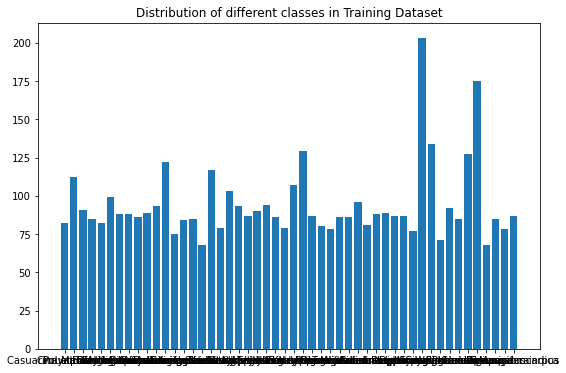

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = data_dir_list
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/bark-data/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [ ]:
for i in data_dir_list:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/bark-data/train/'+i+'/'))))

Training Casuarina equisetifolia images are: 82
Training Musa images are: 112
Training Citrus aurantiifolia images are: 91
Training Polyalthia longifolia images are: 85
Training Wrightia images are: 82
Training Ficus racemosa images are: 99
Training Erythrina fusca images are: 88
Training Artocarpus altilis images are: 88
Training Barringtonia acutangula images are: 86
Training Prunus salicina images are: 89
Training Cocos nucifera images are: 93
Training Adenium species images are: 122
Training Dalbergia oliveri images are: 75
Training Khaya senegalensis A.Juss images are: 84
Training Cananga odorata images are: 85
Training Adenanthera microsperma images are: 68
Training Artocarpus heterophyllus images are: 117
Training Senna siamea images are: 79
Training Psidium guajava images are: 103
Training Hevea brasiliensis images are: 93
Training Melia azedarach images are: 87
Training Melaleuca images are: 90
Training Chrysophyllum cainino images are: 94
Training Tectona grandis images are: 

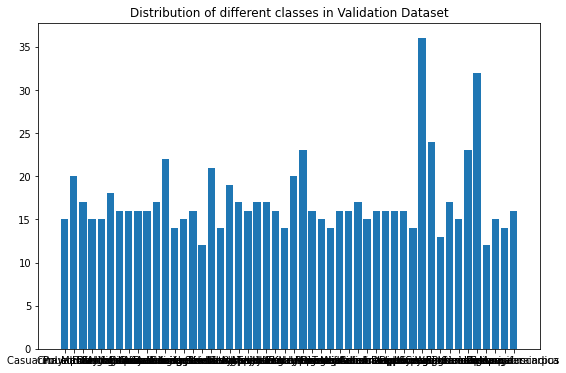

In [ ]:
image_folder = data_dir_list
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/bark-data/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [ ]:
for i in data_dir_list:
    print('Valid {} images are: '.format(i)+str(len(os.listdir('/content/bark-data/validation/'+i+'/'))))

Valid Casuarina equisetifolia images are: 15
Valid Musa images are: 20
Valid Citrus aurantiifolia images are: 17
Valid Polyalthia longifolia images are: 15
Valid Wrightia images are: 15
Valid Ficus racemosa images are: 18
Valid Erythrina fusca images are: 16
Valid Artocarpus altilis images are: 16
Valid Barringtonia acutangula images are: 16
Valid Prunus salicina images are: 16
Valid Cocos nucifera images are: 17
Valid Adenium species images are: 22
Valid Dalbergia oliveri images are: 14
Valid Khaya senegalensis A.Juss images are: 15
Valid Cananga odorata images are: 16
Valid Adenanthera microsperma images are: 12
Valid Artocarpus heterophyllus images are: 21
Valid Senna siamea images are: 14
Valid Psidium guajava images are: 19
Valid Hevea brasiliensis images are: 17
Valid Melia azedarach images are: 16
Valid Melaleuca images are: 17
Valid Chrysophyllum cainino images are: 17
Valid Tectona grandis images are: 16
Valid Cedrus images are: 14
Valid Eucalyptus images are: 20
Valid Veitchi

## Step 3. Deep Learning with Data Augumentation 

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
img_width=256; img_height=256
batch_size=16

In [ ]:
TRAINING_DIR = '/content/bark-data/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 4720 images belonging to 50 classes.


In [ ]:
VALIDATION_DIR = '/content/bark-data/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 858 images belonging to 50 classes.


In [ ]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [ ]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(50, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        3

In [ ]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

Epoch 1/30
295/295 [==============================] - ETA: 0s - loss: 3.9030 - accuracy: 0.0411

295/295 [==============================] - 598s 2s/step - loss: 3.9030 - accuracy: 0.0411 - val_loss: 3.8872 - val_accuracy: 0.0420
Epoch 2/30
295/295 [==============================] - ETA: 0s - loss: 3.8919 - accuracy: 0.0430

295/295 [==============================] - 589s 2s/step - loss: 3.8919 - accuracy: 0.0430 - val_loss: 3.8859 - val_accuracy: 0.0420
Epoch 3/30
295/295 [==============================] - ETA: 0s - loss: 3.8895 - accuracy: 0.0424

295/295 [==============================] - 591s 2s/step - loss: 3.8895 - accuracy: 0.0424 - val_loss: 3.8852 - val_accuracy: 0.0420
Epoch 4/30
295/295 [==============================] - ETA: 0s - loss: 3.8888 - accuracy: 0.0430

295/295 [==============================] - 591s 2s/step - loss: 3.8888 - accuracy: 0.0430 - val_loss: 3.8856 - val_accuracy: 0.0420
Epoch 5/30
295/295 [==============================] - ETA: 0s - loss: 3.8885 - accuracy: 0.0430

295/295 [==============================] - 589s 2s/step - loss: 3.8885 - accuracy: 0.0430 - val_loss: 3.8851 - val_accuracy: 0.0420
Epoch 6/30
295/295 [==============================] - ETA: 0s - loss: 3.8876 - accuracy: 0.0430

295/295 [==============================] - 595s 2s/step - loss: 3.8876 - accuracy: 0.0430 - val_loss: 3.8856 - val_accuracy: 0.0420
Epoch 7/30
295/295 [==============================] - ETA: 0s - loss: 3.8878 - accuracy: 0.0430

295/295 [==============================] - 587s 2s/step - loss: 3.8878 - accuracy: 0.0430 - val_loss: 3.8852 - val_accuracy: 0.0420
Epoch 8/30
295/295 [==============================] - ETA: 0s - loss: 3.8874 - accuracy: 0.0430

295/295 [==============================] - 587s 2s/step - loss: 3.8874 - accuracy: 0.0430 - val_loss: 3.8850 - val_accuracy: 0.0420
Epoch 9/30
295/295 [==============================] - ETA: 0s - loss: 3.8875 - accuracy: 0.0430

295/295 [==============================] - 591s 2s/step - loss: 3.8875 - accuracy: 0.0430 - val_loss: 3.8851 - val_accuracy: 0.0420
Epoch 10/30
295/295 [==============================] - ETA: 0s - loss: 3.8872 - accuracy: 0.0430

295/295 [==============================] - 583s 2s/step - loss: 3.8872 - accuracy: 0.0430 - val_loss: 3.8851 - val_accuracy: 0.0420
Epoch 11/30
295/295 [==============================] - ETA: 0s - loss: 3.8872 - accuracy: 0.0430

295/295 [==============================] - 584s 2s/step - loss: 3.8872 - accuracy: 0.0430 - val_loss: 3.8856 - val_accuracy: 0.0420
Epoch 12/30
295/295 [==============================] - ETA: 0s - loss: 3.8870 - accuracy: 0.0430

295/295 [==============================] - 584s 2s/step - loss: 3.8870 - accuracy: 0.0430 - val_loss: 3.8850 - val_accuracy: 0.0420
Epoch 13/30
295/295 [==============================] - ETA: 0s - loss: 3.8868 - accuracy: 0.0430

295/295 [==============================] - 588s 2s/step - loss: 3.8868 - accuracy: 0.0430 - val_loss: 3.8853 - val_accuracy: 0.0420
Epoch 14/30
295/295 [==============================] - ETA: 0s - loss: 3.8867 - accuracy: 0.0430

295/295 [==============================] - 587s 2s/step - loss: 3.8867 - accuracy: 0.0430 - val_loss: 3.8855 - val_accuracy: 0.0420
Epoch 15/30
295/295 [==============================] - ETA: 0s - loss: 3.8867 - accuracy: 0.0430

295/295 [==============================] - 585s 2s/step - loss: 3.8867 - accuracy: 0.0430 - val_loss: 3.8850 - val_accuracy: 0.0420
Epoch 16/30
295/295 [==============================] - ETA: 0s - loss: 3.8868 - accuracy: 0.0430

295/295 [==============================] - 584s 2s/step - loss: 3.8868 - accuracy: 0.0430 - val_loss: 3.8851 - val_accuracy: 0.0420
Epoch 17/30
295/295 [==============================] - ETA: 0s - loss: 3.8864 - accuracy: 0.0430

295/295 [==============================] - 581s 2s/step - loss: 3.8864 - accuracy: 0.0430 - val_loss: 3.8852 - val_accuracy: 0.0420
Epoch 18/30
295/295 [==============================] - ETA: 0s - loss: 3.8865 - accuracy: 0.0430

295/295 [==============================] - 585s 2s/step - loss: 3.8865 - accuracy: 0.0430 - val_loss: 3.8850 - val_accuracy: 0.0420
Epoch 19/30
295/295 [==============================] - ETA: 0s - loss: 3.8863 - accuracy: 0.0430

295/295 [==============================] - 585s 2s/step - loss: 3.8863 - accuracy: 0.0430 - val_loss: 3.8850 - val_accuracy: 0.0420
Epoch 20/30
295/295 [==============================] - ETA: 0s - loss: 3.8866 - accuracy: 0.0430

295/295 [==============================] - 585s 2s/step - loss: 3.8866 - accuracy: 0.0430 - val_loss: 3.8850 - val_accuracy: 0.0420
Epoch 21/30
295/295 [==============================] - ETA: 0s - loss: 3.8864 - accuracy: 0.0430

295/295 [==============================] - 585s 2s/step - loss: 3.8864 - accuracy: 0.0430 - val_loss: 3.8849 - val_accuracy: 0.0420
Epoch 22/30
295/295 [==============================] - ETA: 0s - loss: 3.8863 - accuracy: 0.0430

295/295 [==============================] - 583s 2s/step - loss: 3.8863 - accuracy: 0.0430 - val_loss: 3.8855 - val_accuracy: 0.0420
Epoch 23/30
295/295 [==============================] - ETA: 0s - loss: 3.8862 - accuracy: 0.0430

295/295 [==============================] - 582s 2s/step - loss: 3.8862 - accuracy: 0.0430 - val_loss: 3.8850 - val_accuracy: 0.0420
Epoch 24/30
295/295 [==============================] - ETA: 0s - loss: 3.8862 - accuracy: 0.0430

295/295 [==============================] - 582s 2s/step - loss: 3.8862 - accuracy: 0.0430 - val_loss: 3.8849 - val_accuracy: 0.0420
Epoch 25/30
295/295 [==============================] - ETA: 0s - loss: 3.8862 - accuracy: 0.0430

295/295 [==============================] - 581s 2s/step - loss: 3.8862 - accuracy: 0.0430 - val_loss: 3.8851 - val_accuracy: 0.0420
Epoch 26/30
295/295 [==============================] - ETA: 0s - loss: 3.8862 - accuracy: 0.0430

295/295 [==============================] - 587s 2s/step - loss: 3.8862 - accuracy: 0.0430 - val_loss: 3.8849 - val_accuracy: 0.0420
Epoch 27/30
295/295 [==============================] - ETA: 0s - loss: 3.8862 - accuracy: 0.0430

295/295 [==============================] - 583s 2s/step - loss: 3.8862 - accuracy: 0.0430 - val_loss: 3.8850 - val_accuracy: 0.0420
Epoch 28/30
295/295 [==============================] - ETA: 0s - loss: 3.8860 - accuracy: 0.0430

295/295 [==============================] - 585s 2s/step - loss: 3.8860 - accuracy: 0.0430 - val_loss: 3.8851 - val_accuracy: 0.0420
Epoch 29/30
295/295 [==============================] - ETA: 0s - loss: 3.8863 - accuracy: 0.0430

295/295 [==============================] - 587s 2s/step - loss: 3.8863 - accuracy: 0.0430 - val_loss: 3.8849 - val_accuracy: 0.0420
Epoch 30/30
295/295 [==============================] - ETA: 0s - loss: 3.8860 - accuracy: 0.0430

295/295 [==============================] - 587s 2s/step - loss: 3.8860 - accuracy: 0.0430 - val_loss: 3.8850 - val_accuracy: 0.0420


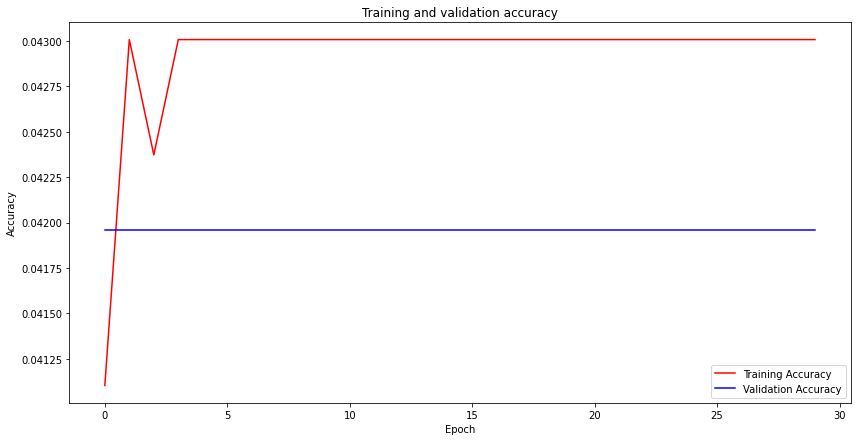

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

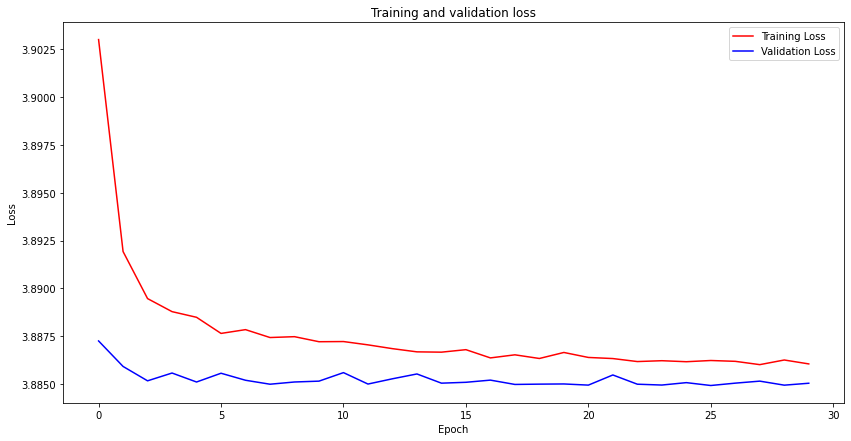

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

## Step 4. Checking performance on Test Data (Out of the sample)

In [ ]:
# Read Test Images Dir and their labels
test_images_dir = '/content/dataset/test/'
test_df = pd.read_csv('/content/dataset/test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/test_preproc_CNN.npy', test_preprocessed_images)

In [ ]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

30/30 [==============================] - 0s 3ms/step
[0 0 3 3 2 0 2 0 0 0 4 3 2 0 2 2 2 2 2 2 3 3 3 4 4 4 4 4 4 4]


In [ ]:
test_df = pd.read_csv('/content/dataset/test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    2
15    2
16    2
17    2
18    2
19    2
20    3
21    3
22    3
23    4
24    4
25    4
26    4
27    4
28    4
29    4
Name: labels, dtype: int64


In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[2, 0, 0, 2, 0],
       [5, 0, 3, 1, 1],
       [0, 0, 6, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 7]])

In [ ]:
train_dir = '/content/bark-data/train/'
classes = os.listdir(train_dir)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

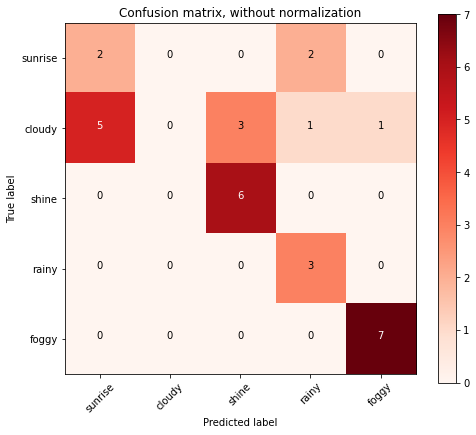

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()